<a href="https://colab.research.google.com/github/Sandeshmore7038/Machine-Learning-Tasks-by-Webelights-Sandesh-More-/blob/main/task_2_webelight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

In [ ]:
# loading the dataset
data = pd.read_csv('/content/wine-clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# Inspect the dataset
print(data.columns)
print(data.info())
print(data.describe())

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD

In [ ]:
# Select features and scale them
X = data[['Alcohol', 'Color_Intensity']]
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [ ]:
# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
y_pred = agglomerative.fit_predict(X_scaled)

In [ ]:
# Count unique clusters
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)


[[ 0 96]
 [ 1 53]
 [ 2 29]]


In [ ]:
# Calculate Davies-Bouldin score
score = davies_bouldin_score(X_scaled, y_pred)
print("Davies-Bouldin Score:", score)

Davies-Bouldin Score: 0.845326725622774


In [ ]:
# Plot inertia and Davies-Bouldin score for different numbers of clusters
inertia = []
davies_bouldin_scores = []
list_clusters = list(range(2, 11))

In [ ]:
for num in list_clusters:
    agglomerative = AgglomerativeClustering(n_clusters=num)
    y_pred = agglomerative.fit_predict(X_scaled)

    # Davies-Bouldin score
    score = davies_bouldin_score(X_scaled, y_pred)
    davies_bouldin_scores.append(score)

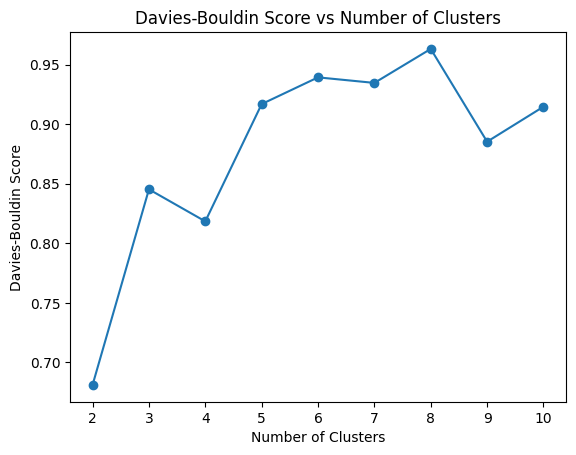

In [ ]:
# Plot Davies-Bouldin scores
plt.plot(list_clusters, davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs Number of Clusters')
plt.show()

In [ ]:
# Final Agglomerative Clustering with k=5
agglomerative = AgglomerativeClustering(n_clusters=5)
y_pred = agglomerative.fit_predict(X_scaled)
y_pred

array([3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 4, 1, 0, 3, 0, 0, 3, 0, 0, 4, 0, 3, 4, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 4, 2, 2, 4, 3, 0, 0, 2, 3, 2, 2, 4, 4, 0, 2, 2, 3, 3, 2,
       4, 2])

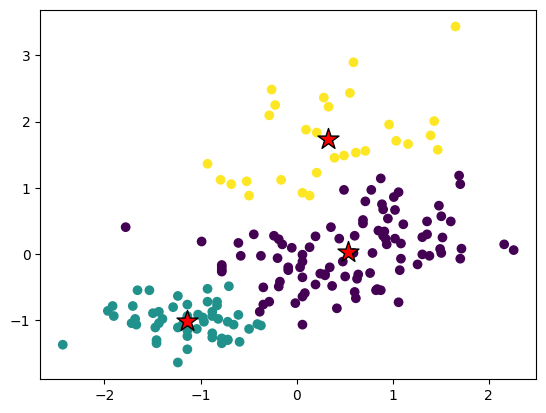

In [ ]:
# Plot the clusters and cluster centers
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', label='Data Points')
cluster_centers = np.array([X_scaled[y_pred == i].mean(axis=0) for i in range(3)])
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=250, c='red', edgecolors='k', label='Cluster Centers')

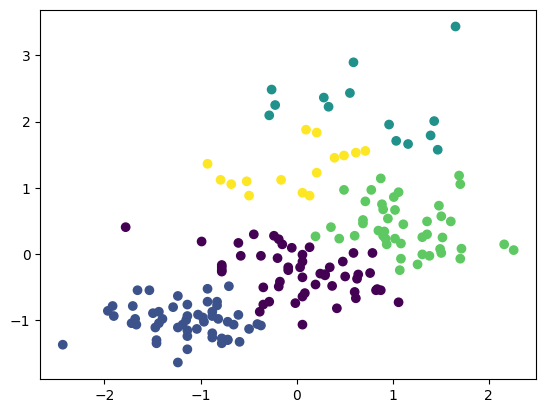

In [ ]:
# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis')

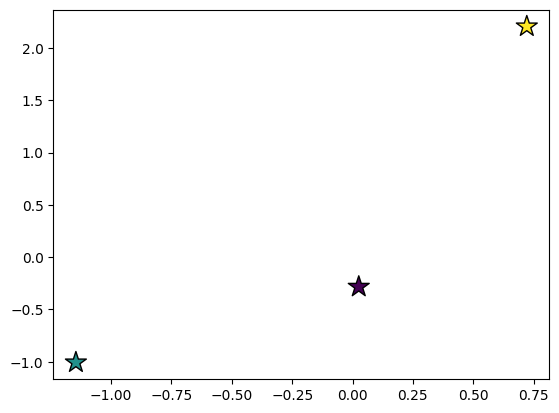

In [ ]:
# The cluster centers are not available for Agglomerative Clustering directly
# We'll use the mean of points in each cluster as a proxy for the cluster centers
cluster_centers = np.array([X_scaled[y_pred == i].mean(axis=0) for i in range(3)])
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=250, c=[0, 1, 2], edgecolors='k')

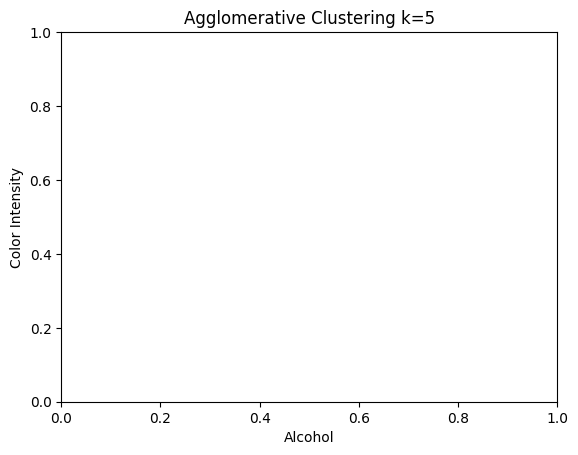

In [ ]:
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Agglomerative Clustering k=5')
plt.show()